In [1]:
# Importing necessary libraries and importing CSV files into respective dataframes

import pandas as pd

df_CPI = pd.read_csv("./data/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv")
df_Housing = pd.read_csv("./data/housing-affordability-in-canada/housing-supply-price-rental.csv")
df_HPIRegions = pd.read_csv("./data/housing-affordability-in-canada/HPI 1981-2022 by regions.csv")
df_HPIFederalandProvincial = pd.read_csv("./data/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv")
df_Income = pd.read_csv("./data/housing-affordability-in-canada/income-distribution-2012-2020.csv")
df_Interest = pd.read_csv("./data/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv")
df_PopulationDwellings = pd.read_csv("./data/housing-affordability-in-canada/population_dwellings_count.csv")
df_PopulationRegion = pd.read_csv("./data/housing-affordability-in-canada/population-by-region-1946-2022.csv")
df_Structural = pd.read_csv("./data/housing-affordability-in-canada/Structural-dwellings-household-size.csv")
df_CPI['GEO'].unique()


array(['Canada', "St. John's, Newfoundland and Labrador",
       'Halifax, Nova Scotia', 'Saint John, New Brunswick',
       'Québec, Quebec', 'Montréal, Quebec',
       'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
       'Toronto, Ontario', 'Thunder Bay, Ontario', 'Winnipeg, Manitoba',
       'Regina, Saskatchewan', 'Saskatoon, Saskatchewan',
       'Edmonton, Alberta', 'Calgary, Alberta',
       'Vancouver, British Columbia',
       'Charlottetown and Summerside, Prince Edward Island',
       'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Whitehorse, Yukon',
       'Yellowknife, Northwest Territories', 'Victoria, British Columbia',
       'Iqaluit, Nunavut'], dtype=object)

In [2]:
# Removes region rows that aren't Canada and selects "All-items"
# df_CPI = df_CPI[df_CPI['GEO'] == 'Canada']
# df_CPI.drop(columns=['GEO'], inplace=True)

provinces = ['Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta']

df_CPI = df_CPI[df_CPI['GEO'].isin(provinces)]


df_CPI = df_CPI[df_CPI['Products and product groups'] == 'All-items']
df_CPI.drop(columns=['Products and product groups'], inplace=True)

# Removes unnecessary columns
df_CPI.drop(columns=['DGUID'], inplace=True)
df_CPI.drop(columns=['UOM'], inplace=True)
df_CPI.drop(columns=['UOM_ID'], inplace=True)
df_CPI.drop(columns=['VECTOR'], inplace=True)
df_CPI.drop(columns=['COORDINATE'], inplace=True)

# Standardizes "Date" name and format
df_CPI['Date'] = df_CPI['REF_DATE'].astype(str) + '01'
df_CPI.drop(columns=['REF_DATE'], inplace=True)

# df_CPI.head(108)

In [3]:
# Standardizes "Date" format and name
df_Housing['Date'] = df_Housing['year'].astype(str).str.replace('.0', '').str.replace('.1', '') + '01'

df_Housing = df_Housing[['Date', 'region', 'population', 'total_dwelling', 'total_dwelling_market', 'labour_participation_rate', 'unemployment_rate', 'disposable_income_change', 
                         'rental_vacancy_rate', 'rental_avilability_rate', 'owned_accommodation_costs_change', 'rental_accommodation_costs_change']]

regions_to_include = ['manitoba', 'prince_edward', 'new_brunswick', 'saskatchewan', 'nova_scotia', 'quebec', 'alberta', 'ontario']

df_Housing = df_Housing[df_Housing['region'].isin(regions_to_include)]

province_mapping = {
    'manitoba': 'Manitoba',
    'prince_edward': 'Prince Edward Island',
    'new_brunswick': 'New Brunswick',
    'saskatchewan': 'Saskatchewan',
    'nova_scotia': 'Nova Scotia',
    'quebec': 'Quebec',
    'alberta': 'Alberta',
    'ontario': 'Ontario'
}

# Update province names in the DataFrame
df_Housing['region'] = df_Housing['region'].map(province_mapping)

df_Housing.shape

/var/folders/nq/ynrswh052nb7tpyrwgjb67q00000gn/T/ipykernel_63079/2030110349.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Housing['Date'] = df_Housing['year'].astype(str).str.replace('.0', '').str.replace('.1', '') + '01'


(216, 12)

In [4]:

df_HPIRegions = df_HPIRegions[df_HPIRegions['Type'] == 'House and Land']
df_HPIRegions.drop(columns = ['Type'], inplace=True)

# List of columns representing regions
regions_columns = ['Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta']

# Melt the dataframe to transform the columns into a single 'region' column
df_HPIRegions = df_HPIRegions.melt(id_vars=['Month-year'], value_vars=regions_columns, var_name='region', value_name='value')
df_HPIRegions = df_HPIRegions.dropna()
df_HPIRegions.head(20)



# Converts "Month-year" to standard format and renames column to "Date"
df_HPIRegions['Month-year'] = pd.to_datetime(df_HPIRegions['Month-year'], format='%b-%y')
def adjust_year(date):
    
    if date.year - 2000 >= 25 and date.year - 2000 <= 99:
        return date.replace(year=date.year - 100)

    return date
df_HPIRegions['Month-year'] = df_HPIRegions['Month-year'].apply(adjust_year)
df_HPIRegions['Month-year'] = df_HPIRegions['Month-year'].dt.strftime('%Y%m')
df_HPIRegions.rename(columns={'Month-year': 'Date'}, inplace=True)
# df_HPIRegions.rename(columns={'Month-year': 'Date'}, inplace=True)

df_HPIRegions.head(1494)

,Date,region,value
60,198601,Prince Edward Island,83.5
61,198602,Prince Edward Island,83.5
62,198603,Prince Edward Island,83.5
63,198604,Prince Edward Island,83.5
64,198605,Prince Edward Island,83.5
...,...,...,...
1729,200008,Quebec,58.3
1730,200009,Quebec,58.6
1731,200010,Quebec,58.8
1732,200011,Quebec,59.0


In [5]:
df_Housing.shape

(216, 12)

In [6]:
merged_df = pd.merge(df_Housing, df_HPIRegions, left_on=['Date', 'region'], right_on=['Date', 'region'], how='left')
merged_df = pd.merge(merged_df, df_CPI, left_on=['Date', 'region'], right_on=['Date', 'GEO'])
merged_df = merged_df.dropna()
merged_df.drop(columns=['GEO'], inplace=True)
merged_df.rename(columns={'value': 'HPI'}, inplace=True)

# Calculate the number of months passed
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y%m')
# merged_df['Num of Months Passed'] = (merged_df['Date'] - merged_df['Date'].min()) // pd.Timedelta(days=30)
merged_df['year'] = merged_df['Date'].dt.year

merged_df.shape

(64, 15)

In [7]:
provinces = pd.get_dummies(merged_df['region'], prefix='region')
provinces = provinces.astype(int)
merged_df = merged_df.join(provinces)
merged_df = merged_df.drop(['region'], axis=1) 
merged_df.head()

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
0,1992-01-01,1112.689,2310,1821,66.475000,9.3,-0.326989,5.8,2.7,0.359644,...,81.2,1992,0,1,0,0,0,0,0,0
1,1993-01-01,1117.618,2425,1702,66.850000,9.3,-0.453243,5.6,2.7,-0.028291,...,83.4,1993,0,1,0,0,0,0,0,0
2,1994-01-01,1123.230,3197,1664,66.750000,8.8,0.161821,5.5,2.7,1.480992,...,84.6,1994,0,1,0,0,0,0,0,0
3,1995-01-01,1129.150,1963,1215,66.575000,7.3,-0.326547,5.2,2.7,3.402119,...,86.9,1995,0,1,0,0,0,0,0,0
4,1996-01-01,1134.196,2318,1243,66.441667,7.2,-0.052561,5.6,2.7,0.647249,...,88.8,1996,0,1,0,0,0,0,0,0


In [8]:
merged_df.head()

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
0,1992-01-01,1112.689,2310,1821,66.475000,9.3,-0.326989,5.8,2.7,0.359644,...,81.2,1992,0,1,0,0,0,0,0,0
1,1993-01-01,1117.618,2425,1702,66.850000,9.3,-0.453243,5.6,2.7,-0.028291,...,83.4,1993,0,1,0,0,0,0,0,0
2,1994-01-01,1123.230,3197,1664,66.750000,8.8,0.161821,5.5,2.7,1.480992,...,84.6,1994,0,1,0,0,0,0,0,0
3,1995-01-01,1129.150,1963,1215,66.575000,7.3,-0.326547,5.2,2.7,3.402119,...,86.9,1995,0,1,0,0,0,0,0,0
4,1996-01-01,1134.196,2318,1243,66.441667,7.2,-0.052561,5.6,2.7,0.647249,...,88.8,1996,0,1,0,0,0,0,0,0


In [9]:
merged_df.describe()

,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,rental_accommodation_costs_change,...,CPI,year,region_Alberta,region_Manitoba,region_New Brunswick,region_Nova Scotia,region_Ontario,region_Prince Edward Island,region_Quebec,region_Saskatchewan
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,3122.909062,13824.890625,11464.796875,64.845964,10.228125,1.568465,4.923438,4.887500,0.549796,1.358883,...,87.617188,1995.500000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
std,3692.110190,17275.739769,15498.241573,3.963626,3.170372,1.986774,1.927392,1.631778,1.223803,0.609941,...,3.296297,2.309401,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
min,130.827000,422.000000,245.000000,58.400000,5.500000,-3.918201,1.400000,2.400000,-1.572577,0.343968,...,80.600000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,877.716000,2398.250000,1614.000000,61.641667,7.275000,0.210657,2.950000,3.825000,-0.411631,0.912783,...,84.950000,1993.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1065.817000,3501.500000,2181.500000,65.650000,9.900000,1.323429,5.300000,5.050000,0.377669,1.270379,...,87.950000,1995.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3992.021500,23332.750000,18491.750000,66.583333,12.525000,3.480862,6.375000,6.400000,1.567646,1.732808,...,90.425000,1997.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11504.759000,67235.000000,62925.000000,72.616667,17.600000,5.771596,8.600000,6.900000,3.402119,2.917392,...,93.600000,1999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
merged_df[['Date', 'population', 'total_dwelling', 'total_dwelling_market',
       'labour_participation_rate', 'unemployment_rate',
       'disposable_income_change', 'rental_vacancy_rate',
       'rental_avilability_rate', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'HPI', 'CPI', 'year']]

,Date,population,total_dwelling,total_dwelling_market,labour_participation_rate,unemployment_rate,disposable_income_change,rental_vacancy_rate,rental_avilability_rate,owned_accommodation_costs_change,rental_accommodation_costs_change,HPI,CPI,year
0,1992-01-01,1112.689,2310,1821,66.475000,9.3,-0.326989,5.8,2.7,0.359644,2.844702,38.3,81.2,1992
1,1993-01-01,1117.618,2425,1702,66.850000,9.3,-0.453243,5.6,2.7,-0.028291,1.731113,39.2,83.4,1993
2,1994-01-01,1123.230,3197,1664,66.750000,8.8,0.161821,5.5,2.7,1.480992,0.906316,40.7,84.6,1994
3,1995-01-01,1129.150,1963,1215,66.575000,7.3,-0.326547,5.2,2.7,3.402119,1.173128,41.9,86.9,1995
4,1996-01-01,1134.196,2318,1243,66.441667,7.2,-0.052561,5.6,2.7,0.647249,0.914938,42.2,88.8,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1995-01-01,10950.119,35818,31893,65.475000,8.7,1.149276,2.3,5.7,1.460726,1.737892,53.6,86.8,1995
60,1996-01-01,11082.903,43062,39512,65.541667,9.0,0.055310,3.0,5.7,-0.833032,1.437506,53.3,88.2,1996
61,1997-01-01,11227.651,54072,49972,65.733333,8.4,3.625058,2.8,5.7,-0.776114,1.490752,53.3,89.8,1997
62,1998-01-01,11365.901,53830,50088,65.933333,7.2,4.683412,2.6,5.7,0.395693,1.260314,54.8,90.6,1998


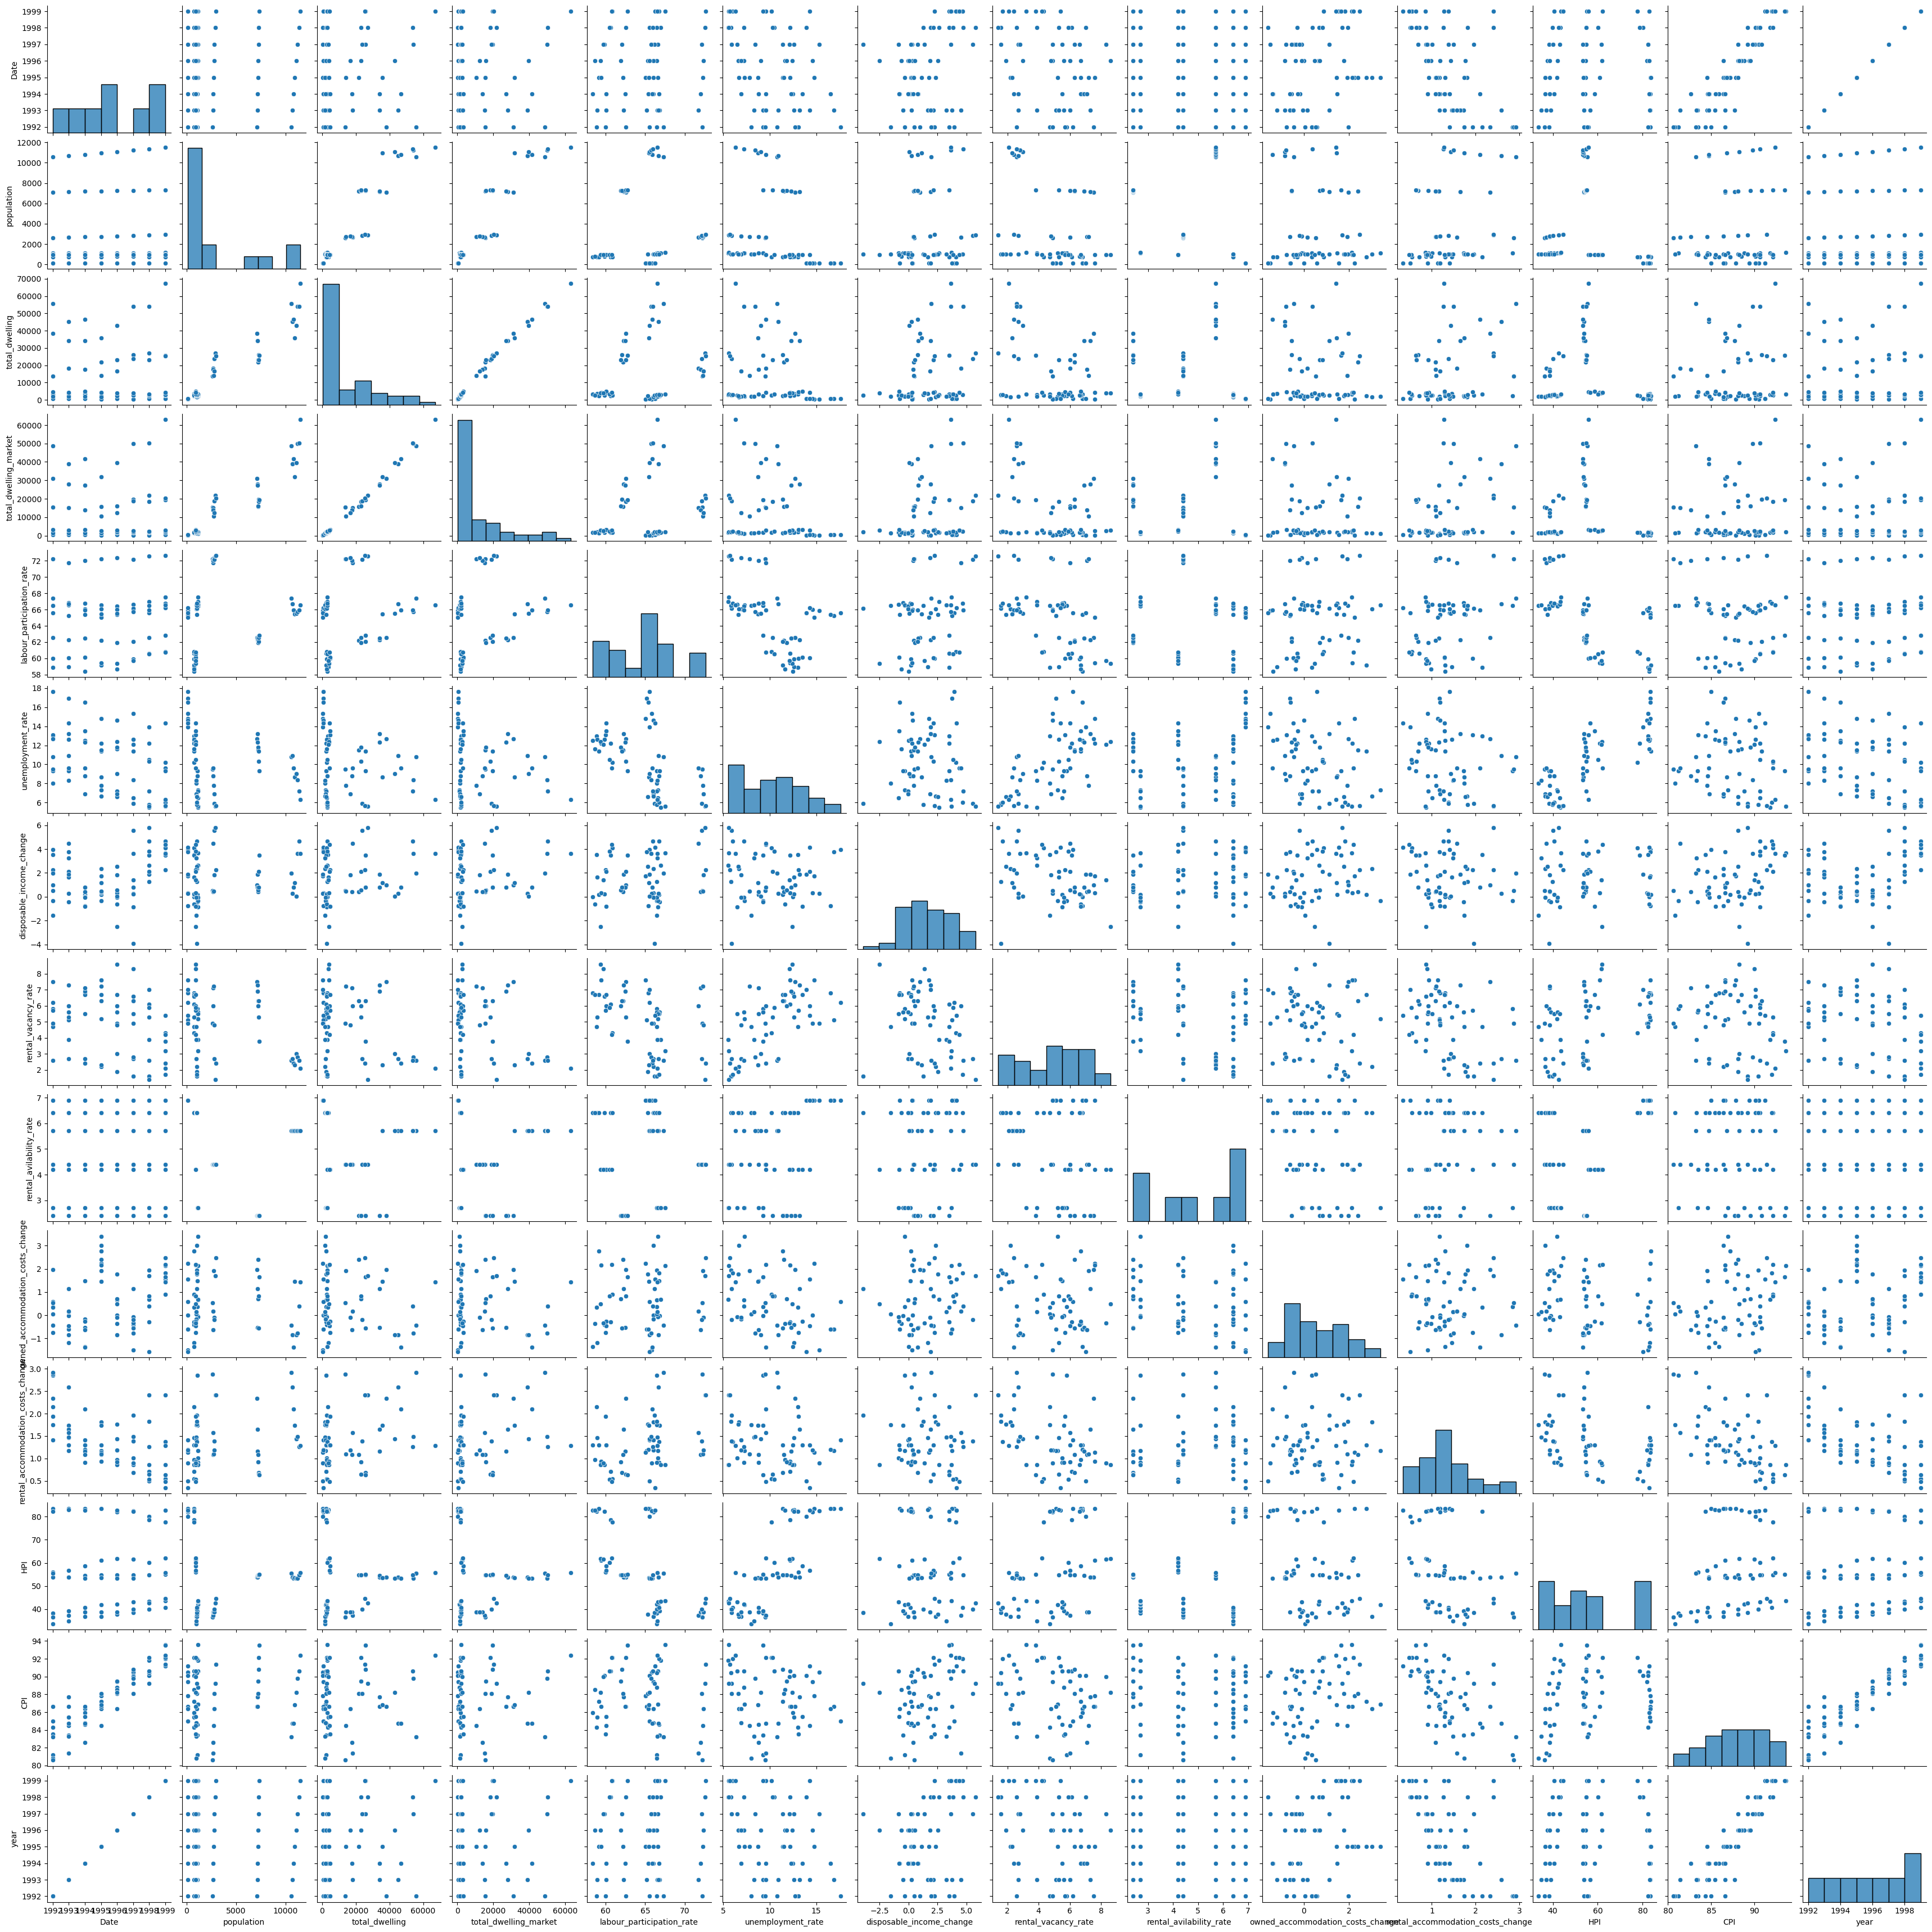

In [24]:
ax = sns.pairplot(data=merged_df, vars=['Date', 'population', 'total_dwelling', 'total_dwelling_market',
       'labour_participation_rate', 'unemployment_rate',
       'disposable_income_change', 'rental_vacancy_rate',
       'rental_avilability_rate', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'HPI', 'CPI', 'year'])
plt.savefig("seaborn_plot.png")
ax

## Model and Feature Selection

### Base model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


y= merged_df['HPI']
# dropped date until we use XGBoost
X = merged_df.drop(['HPI', 'Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=merged_df['year'], random_state=156)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)
print("")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Coefficients:
population : -0.005576499543980309
total_dwelling : 0.0004948493994537294
total_dwelling_market : -0.00034738604196643655
labour_participation_rate : -1.4961662010131223
unemployment_rate : 0.3534998437477344
disposable_income_change : -0.28683448495188013
rental_vacancy_rate : -0.4137724962060163
rental_avilability_rate : 2.3552448779417614
owned_accommodation_costs_change : 0.5466299593329481
rental_accommodation_costs_change : -0.35998111791052223
CPI : 0.8231523675189985
year : -0.43215535069005123
region_Alberta : -4.944069724542935
region_Manitoba : -15.487553143146862
region_New Brunswick : 2.5214264505398396
region_Nova Scotia : -12.990579267103948
region_Ontario : 35.66954455537429
region_Prince Edward Island : 6.896796278769402
region_Quebec : 17.97395813475999
region_Saskatchewan : -29.63952328464954

Mean Squared Error (MSE): 2.1563047492387586
Root Mean Squared Error (RMSE): 1.4684361576993257
R-squared (R2): 0.9896864256998201


### Model using Backwards Stepwise selection

/Users/alexli/anaconda3/envs/MSCI446/lib/python3.11/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Coefficients:
population : -0.005088664256168623
total_dwelling : 0.0001493940291416682
labour_participation_rate : -0.9959729999294782
CPI : 0.47509991026830756
region_Manitoba : -10.228457335262444
region_New Brunswick : 21.015886557404723
region_Ontario : 44.99908143962633
region_Prince Edward Island : 24.67789314857141
region_Quebec : 24.61579638139224
region_Saskatchewan : -15.243055491319408

Selected Features: Index(['population', 'total_dwelling', 'labour_participation_rate', 'CPI',
       'region_Manitoba', 'region_New Brunswick', 'region_Ontario',
       'region_Prince Edward Island', 'region_Quebec', 'region_Saskatchewan'],
      dtype='object')
Mean Squared Error (MSE): 2.403895218409355
Root Mean Squared Error (RMSE): 1.5504500051305605
R-squared (R2): 0.9885022040814664


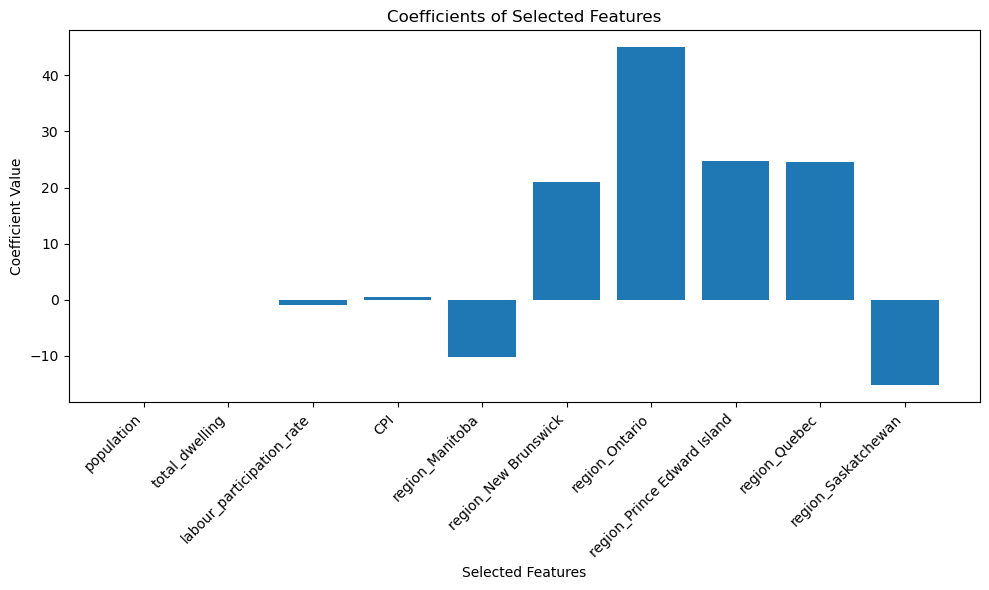

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

model = LinearRegression()

selector = SequentialFeatureSelector(model, direction='backward')

selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]

model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(feature, ":", coef)

print("")
print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(selected_features, model.coef_)
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import Lasso


model = Lasso(alpha=0.1)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)

print("")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Coefficients:
population : -0.0013669323085665312
total_dwelling : 0.0006472887141668991
total_dwelling_market : -0.0005270498466523712
labour_participation_rate : -1.568502389484197
unemployment_rate : 2.1390201879222626
disposable_income_change : -0.14034142516485146
rental_vacancy_rate : -0.1378520966637692
rental_avilability_rate : 5.045705062477059
owned_accommodation_costs_change : 0.5652642995433523
rental_accommodation_costs_change : -0.0
CPI : 1.1250041283630359
year : -0.0
region_Alberta : -0.0
region_Manitoba : 0.0
region_New Brunswick : 0.0
region_Nova Scotia : -9.167652148128248
region_Ontario : 0.0
region_Prince Edward Island : 0.0
region_Quebec : 0.0
region_Saskatchewan : -20.64227236133523

Mean Squared Error (MSE): 2.211501726263378
Root Mean Squared Error (RMSE): 1.4871118741585578
R-squared (R2): 0.989422419360322


/Users/alexli/anaconda3/envs/MSCI446/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+02, tolerance: 1.500e+00
  model = cd_fast.enet_coordinate_descent(


### Random Forest Method

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor (n_estimators=100, random_state=156, max_features=30)

model_rf.fit(X_train, y_train)
preds_test = model_rf.predict(X_test)

MSE = metrics.mean_squared_error(y_test, preds_test)
R2 = metrics.r2_score(y_test, preds_test)

print("")
print("Mean Squared Error (MSE):", MSE)
print("R-squared (R2):", R2)


Mean Squared Error (MSE): 4.245733846153843
R-squared (R2): 0.9796927166734875


In [17]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
import numpy as np

clf = RandomForestRegressor(random_state=156)

params = {
    'max_depth': np.arange(5,40,5),
    'n_estimators': np.arange(50,210,50)
}

grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'max_depth': 10, 'n_estimators': 50}

In [18]:
#Evaluating the tuned model

clf_best = grid_search.best_estimator_
y_test_pred = clf_best.predict(X_test)

print('Hyperparameter tuning of random forest yields MSE and R-squared:', MSE, R2)

Hyperparameter tuning of random forest yields MSE and R-squared: 4.245733846153843 0.9796927166734875


### Polynomial Regression

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

NameError: name 'PolynomialFeatures' is not defined